# 1) Importing data

In [1]:
import numpy as np
import pandas as pd

## 1.a) Import the collection set
The collection set contains metadata of CORD-19 academic papers.

The preprocessed and filtered CORD-19 dataset is available on the Gitlab repository here: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4/subtask_4b

Participants should first download the file then upload it on the Google Colab session with the following steps.


In [2]:
PATH_COLLECTION_DATA = '../subtask4b_collection_data.pkl' #MODIFY PATH
df_collection = pd.read_pickle(PATH_COLLECTION_DATA)

In [3]:
df_collection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 162 to 1056448
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cord_uid          7718 non-null   object        
 1   source_x          7718 non-null   object        
 2   title             7718 non-null   object        
 3   doi               7677 non-null   object        
 4   pmcid             4959 non-null   object        
 5   pubmed_id         6233 non-null   object        
 6   license           7718 non-null   object        
 7   abstract          7718 non-null   object        
 8   publish_time      7715 non-null   object        
 9   authors           7674 non-null   object        
 10  journal           6668 non-null   object        
 11  mag_id            0 non-null      float64       
 12  who_covidence_id  528 non-null    object        
 13  arxiv_id          20 non-null     object        
 14  label             7718 n

In [4]:
df_collection.head()

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,label,time,timet
162,umvrwgaw,PMC,Professional and Home-Made Face Masks Reduce E...,10.1371/journal.pone.0002618,PMC2440799,18612429,cc-by,BACKGROUND: Governments are preparing for a po...,2008-07-09,"van der Sande, Marianne; Teunis, Peter; Sabel,...",PLoS One,NaN,NaN,NaN,umvrwgaw,2008-07-09,1215561600
611,spiud6ok,PMC,The Failure of R (0),10.1155/2011/527610,PMC3157160,21860658,cc-by,"The basic reproductive ratio, R (0), is one of...",2011-08-16,"Li, Jing; Blakeley, Daniel; Smith?, Robert J.",Comput Math Methods Med,NaN,NaN,NaN,spiud6ok,2011-08-16,1313452800
918,aclzp3iy,PMC,Pulmonary sequelae in a patient recovered from...,10.4103/0970-2113.99118,PMC3424870,22919170,cc-by-nc-sa,The pandemic of swine flu (H1N1) influenza spr...,2012,"Singh, Virendra; Sharma, Bharat Bhushan; Patel...",Lung India,NaN,NaN,NaN,aclzp3iy,2012-01-01,1325376000
993,ycxyn2a2,PMC,What was the primary mode of smallpox transmis...,10.3389/fcimb.2012.00150,PMC3509329,23226686,cc-by,The mode of infection transmission has profoun...,2012-11-29,"Milton, Donald K.",Front Cell Infect Microbiol,NaN,NaN,NaN,ycxyn2a2,2012-11-29,1354147200
1053,zxe95qy9,PMC,"Lessons from the History of Quarantine, from P...",10.3201/eid1902.120312,PMC3559034,23343512,no-cc,"In the new millennium, the centuries-old strat...",2013-02-03,"Tognotti, Eugenia",Emerg Infect Dis,NaN,NaN,NaN,zxe95qy9,2013-02-03,1359849600


## 1.b) Import the query set

The query set contains tweets with implicit references to academic papers from the collection set.

The preprocessed query set is available on the Gitlab repository here: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4/subtask_4b

Participants should first download the file then upload it on the Google Colab session with the following steps.

In [5]:
# 1) Download the query tweets from the Gitlab repository: https://gitlab.com/checkthat_lab/clef2025-checkthat-lab/-/tree/main/task4/subtask_4b?ref_type=heads
# 2) Drag and drop the downloaded file to the "Files" section (left vertical menu on Colab)
# 3) Modify the path to your local file path
PATH_QUERY_TRAIN_DATA = '../subtask4b_query_tweets_train.tsv' #MODIFY PATH
PATH_QUERY_DEV_DATA = '../subtask4b_query_tweets_dev.tsv' #MODIFY PATH

In [6]:
df_query_train = pd.read_csv(PATH_QUERY_TRAIN_DATA, sep = '\t')
df_query_dev = pd.read_csv(PATH_QUERY_DEV_DATA, sep = '\t')

In [7]:
df_query_train.head()

,post_id,tweet_text,cord_uid
0,0,Oral care in rehabilitation medicine: oral vul...,htlvpvz5
1,1,this study isn't receiving sufficient attentio...,4kfl29ul
2,2,"thanks, xi jinping. a reminder that this study...",jtwb17u8
3,3,Taiwan - a population of 23 million has had ju...,0w9k8iy1
4,4,Obtaining a diagnosis of autism in lower incom...,tiqksd69


In [8]:
df_query_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12853 entries, 0 to 12852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post_id     12853 non-null  int64 
 1   tweet_text  12853 non-null  object
 2   cord_uid    12853 non-null  object
dtypes: int64(1), object(2)
memory usage: 301.4+ KB


In [9]:
df_query_dev.head()

,post_id,tweet_text,cord_uid
0,16,covid recovery: this study from the usa reveal...,3qvh482o
1,69,"""Among 139 clients exposed to two symptomatic ...",r58aohnu
2,73,I recall early on reading that researchers who...,sts48u9i
3,93,You know you're credible when NIH website has ...,3sr2exq9
4,96,Resistance to antifungal medications is a grow...,ybwwmyqy


In [10]:
df_query_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post_id     1400 non-null   int64 
 1   tweet_text  1400 non-null   object
 2   cord_uid    1400 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.9+ KB


# 2)

In [11]:
from sentence_transformers import SentenceTransformer

# Load SPECTER2 (designed for scientific paper embeddings)
model = SentenceTransformer("allenai/specter2_base")


C:\Users\vikho\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No sentence-transformers model found with name allenai/specter2_base. Creating a new one with mean pooling.


In [12]:
from sentence_transformers import InputExample
from torch.utils.data import DataLoader

# Create a text column in the collection: title + abstract
df_collection['text'] = df_collection[['title', 'abstract']].fillna('').agg(' '.join, axis=1)

# Create training examples
train_examples = []

for _, row in df_query_train.iterrows(): # "_, row" --> ignore index and keep the row (is series)
    tweet = row['tweet_text']
    cord_uid = row['cord_uid']
    
    # Get the paper text (title + abstract)
    paper_row = df_collection[df_collection['cord_uid'] == cord_uid]
    
    if not paper_row.empty:
        paper_text = paper_row['text'].values[0]
        train_examples.append(InputExample(texts=[tweet, paper_text]))

train_examples = train_examples[:500]  # needed so program does not run forever


train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=4, num_workers = 0)

In [13]:
from sentence_transformers import losses
from datetime import datetime

# Define the contrastive loss
train_loss = losses.MultipleNegativesRankingLoss(model)

class LoggingCallback:
    def __call__(self, score, epoch, steps):
        print(f"[{datetime.now().strftime('%H:%M:%S')}] Epoch {epoch+1} | Step {steps} | Score: {score}")


model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=1,
    warmup_steps=0,  
    show_progress_bar=True,
    callback=LoggingCallback(),
    use_amp = False
)


Step,Training Loss


In [15]:
# Combine title and abstract again (if needed)
df_collection['text'] = df_collection[['title', 'abstract']].fillna('').agg(' '.join, axis=1)

# Encode all papers using the fine-tuned model
collection_texts = df_collection['text'].tolist()
cord_uids = df_collection['cord_uid'].tolist()

collection_embeddings = model.encode(collection_texts, convert_to_numpy=True, show_progress_bar=True)

Batches: 100%|██████████| 242/242 [3:20:48<00:00, 49.79s/it]  


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_topk_finetuned(query_text, k=5):
    query_vec = model.encode([query_text], convert_to_numpy=True)
    similarities = cosine_similarity(query_vec, collection_embeddings)[0]
    topk_indices = np.argsort(-similarities)[:k]
    return [cord_uids[i] for i in topk_indices]


Apply function to all tweets.

In [17]:
df_query_train['fine_tuned_topk'] = df_query_train['tweet_text'].apply(get_topk_finetuned)
df_query_dev['fine_tuned_topk'] = df_query_dev['tweet_text'].apply(get_topk_finetuned)

# 3) Evaluating the baseline
The following code evaluates the TF-IDF retrieval baseline on the query set using the Mean Reciprocal Rank score (MRR@5).

In [18]:
# Evaluate retrieved candidates using MRR@k
def get_performance_mrr(data, col_gold, col_pred, list_k = [1, 5, 10]):
    d_performance = {}
    for k in list_k:
        data["in_topx"] = data.apply(lambda x: (1/([i for i in x[col_pred][:k]].index(x[col_gold]) + 1) if x[col_gold] in [i for i in x[col_pred][:k]] else 0), axis=1)
        #performances.append(data["in_topx"].mean())
        d_performance[k] = data["in_topx"].mean()
    return d_performance


In [20]:
results_train = get_performance_mrr(df_query_train, 'cord_uid', 'fine_tuned_topk')
results_dev = get_performance_mrr(df_query_dev, 'cord_uid', 'fine_tuned_topk')
# Printed MRR@k results in the following format: {k: MRR@k}
print(f"Results on the train set: {results_train}")
print(f"Results on the dev set: {results_dev}")

Results on the train set: {1: np.float64(0.45654710962421224), 5: np.float64(0.5290814077128556), 10: np.float64(0.5290814077128556)}
Results on the dev set: {1: np.float64(0.4857142857142857), 5: np.float64(0.5478095238095239), 10: np.float64(0.5478095238095239)}


Visualize for report.

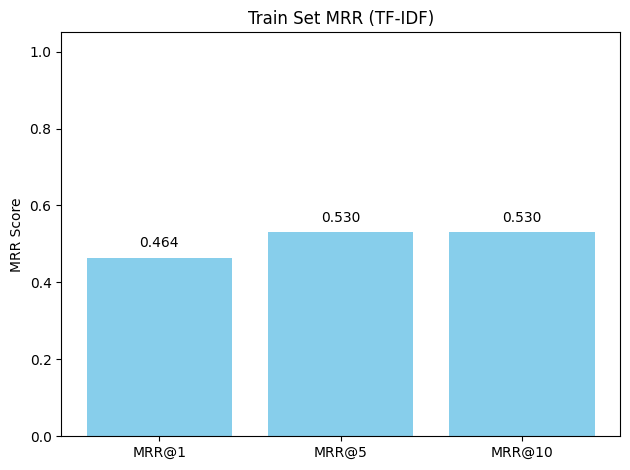

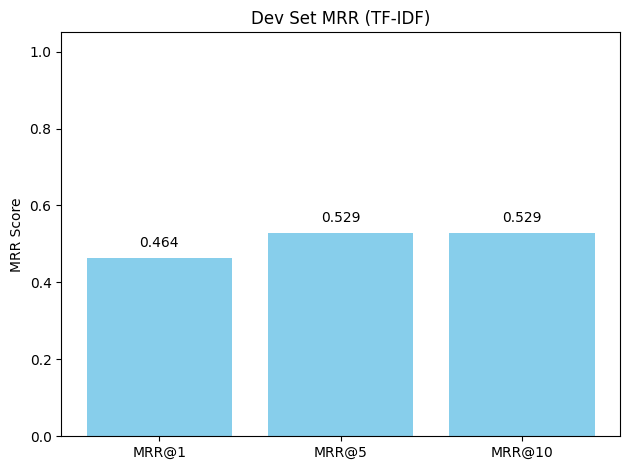

In [64]:
import matplotlib.pyplot as plt

def plot_mrr(results_dict, title):
    ks = list(results_dict.keys())
    mrrs = [float(x) for x in results_dict.values()]  
    bars = plt.bar([f"MRR@{k}" for k in ks], mrrs, color='skyblue')

    # Add value labels on top of bars
    for bar, mrr in zip(bars, mrrs):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                 f"{mrr:.3f}", ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 1.05)
    plt.ylabel("MRR Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mrr(results_train, "Train Set MRR (TF-IDF)")
plot_mrr(results_dev, "Dev Set MRR (TF-IDF)")


# 4) Exporting results to prepare the submission on Codalab

In [61]:
df_query_dev['preds'] = df_query_dev['tfidf_topk'].apply(lambda x: x[:5])

In [62]:
df_query_dev[['post_id', 'preds']].to_csv('tfidf_predictions.tsv', index=None, sep='\t')